# Testing Trained 'Appa' Model

Having trained a small CNN called 'Appa' for classifying digits, we load the saved model and test its prediction on the MNIST validation set.


In [1]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# Load validation data. 
data_path = 'C:\\Users\\Kyle\\Documents\\GitHub\\data\\'
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

val_set = torchvision.datasets.MNIST(data_path, train=False, download=True,  transform=transform)

In [3]:
# Show image of digit. 
def imshow(img):
    # display an image
    img = img.cpu()
    npimg = img.numpy()
    # Display image by reordering channels to match pyplot's expectation
    plt.imshow(npimg[0])

In [4]:
import os 
import sys
import numpy as np

# Import Appa model class.
path_dir = 'C:\\Users\\Kyle\\Documents\\GitHub\\Learning-Repo\\Pytorch\\MNIST'
sys.path.append(path_dir)

from models import AppaNet

# Load saved parameters. 
model = AppaNet()
model.load_state_dict(torch.load(path_dir+'/models/appa_mnist.pt'))
model.eval()
model.to('cuda:0')


AppaNet(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.3, inplace=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (dense1): Linear(in_features=392, out_features=20, bias=True)
  (dense2): Linear(in_features=20, out_features=10, bias=True)
)

Index: 1955 Predicted: 2, Label: 8


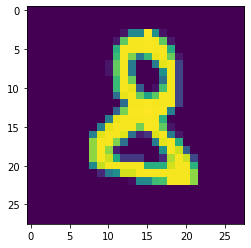

In [30]:
'''
Run this cell to randomly select entry from validation set, 
display it, and test what the model classifies it as.
'''
index = np.random.choice(len(val_set))
img, label = val_set[index]

with torch.no_grad():
    img = img.to('cuda:0')
    _, pred = torch.max(model(img.unsqueeze(0)), dim=1)
    imshow(img)
    print(f'Index: {index} Predicted: {pred.item()}, Label: {label}')